In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
color = sns.color_palette()
sns.set_style('darkgrid')
sns.set_context('notebook')

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

In [2]:
train_variants_df = pd.read_csv("training_variants")
test_variants_df = pd.read_csv("test_variants")
train_text_df = pd.read_csv("training_text", sep="\|\|", engine='python', header=None, skiprows=1, names=["ID","Text"])
test_text_df = pd.read_csv("test_text", sep="\|\|", engine='python', header=None, skiprows=1, names=["ID","Text"])

print("Train and Test variants shape : ",train_variants_df.shape, test_variants_df.shape)
print("Train and Test text shape : ",train_text_df.shape, test_text_df.shape)

Train and Test variants shape :  (3321, 4) (5668, 3)
Train and Test text shape :  (3321, 2) (5668, 2)


In [3]:
train_variants_df.Class.value_counts()

7    953
4    686
1    568
2    452
6    275
5    242
3     89
9     37
8     19
Name: Class, dtype: int64

In [4]:
# replace X123X variation types with "protein swap" and look at distribution of classes for each variation

mutationTypes = {'Truncating Mutations','Deletion','Amplification','Fusions','Overexpression','ProteinSwap'}

# copy the variation column
train_variants_df['Variation_Alt'] = train_variants_df['Variation']

# replace values
train_variants_df['Variation_Alt'] = np.where(train_variants_df['Variation_Alt'].isin(mutationTypes), train_variants_df['Variation_Alt'], 'ProteinSwap')


In [5]:
train_variants_df['Variation_Alt']

0       Truncating Mutations
1                ProteinSwap
2                ProteinSwap
3                ProteinSwap
4                ProteinSwap
                ...         
3316             ProteinSwap
3317             ProteinSwap
3318                 Fusions
3319             ProteinSwap
3320             ProteinSwap
Name: Variation_Alt, Length: 3321, dtype: object

In [6]:
# add information about word count and character count
train_text_df["num_words"] = train_text_df["Text"].apply(lambda x: len(str(x).split()) )
train_text_df["num_chars"] = train_text_df["Text"].apply(lambda x: len(str(x)) )

test_text_df["num_words"] = test_text_df["Text"].apply(lambda x: len(str(x).split()) )
test_text_df["num_chars"] = test_text_df["Text"].apply(lambda x: len(str(x)) )

In [7]:
# first merge dataframes
train_df = train_variants_df.merge(train_text_df, how='inner', left_on='ID', right_on='ID')
test_df = test_variants_df.merge(test_text_df, how='inner', left_on='ID', right_on='ID')

In [8]:
train_df

,ID,Gene,Variation,Class,Variation_Alt,Text,num_words,num_chars
0,0,FAM58A,Truncating Mutations,1,Truncating Mutations,Cyclin-dependent kinases (CDKs) regulate a var...,6089,39765
1,1,CBL,W802*,2,ProteinSwap,Abstract Background Non-small cell lung canc...,5722,36831
2,2,CBL,Q249E,2,ProteinSwap,Abstract Background Non-small cell lung canc...,5722,36831
3,3,CBL,N454D,3,ProteinSwap,Recent evidence has demonstrated that acquired...,5572,36308
4,4,CBL,L399V,4,ProteinSwap,Oncogenic mutations in the monomeric Casitas B...,6202,41427
...,...,...,...,...,...,...,...,...
3316,3316,RUNX1,D171N,4,ProteinSwap,Introduction Myelodysplastic syndromes (MDS) ...,11021,74278
3317,3317,RUNX1,A122*,1,ProteinSwap,Introduction Myelodysplastic syndromes (MDS) ...,6068,40363
3318,3318,RUNX1,Fusions,1,Fusions,The Runt-related transcription factor 1 gene (...,5122,36384
3319,3319,RUNX1,R80C,4,ProteinSwap,The RUNX1/AML1 gene is the most frequent targe...,4885,32568


In [9]:
train_df = train_df[train_df['Text'].notna()]
test_df = test_df[test_df['Text'].notna()]

In [10]:
train_df

,ID,Gene,Variation,Class,Variation_Alt,Text,num_words,num_chars
0,0,FAM58A,Truncating Mutations,1,Truncating Mutations,Cyclin-dependent kinases (CDKs) regulate a var...,6089,39765
1,1,CBL,W802*,2,ProteinSwap,Abstract Background Non-small cell lung canc...,5722,36831
2,2,CBL,Q249E,2,ProteinSwap,Abstract Background Non-small cell lung canc...,5722,36831
3,3,CBL,N454D,3,ProteinSwap,Recent evidence has demonstrated that acquired...,5572,36308
4,4,CBL,L399V,4,ProteinSwap,Oncogenic mutations in the monomeric Casitas B...,6202,41427
...,...,...,...,...,...,...,...,...
3316,3316,RUNX1,D171N,4,ProteinSwap,Introduction Myelodysplastic syndromes (MDS) ...,11021,74278
3317,3317,RUNX1,A122*,1,ProteinSwap,Introduction Myelodysplastic syndromes (MDS) ...,6068,40363
3318,3318,RUNX1,Fusions,1,Fusions,The Runt-related transcription factor 1 gene (...,5122,36384
3319,3319,RUNX1,R80C,4,ProteinSwap,The RUNX1/AML1 gene is the most frequent targe...,4885,32568


In [12]:
train_df1 = train_df[train_df["Class"]== 1]
train_df1 = train_df1.head(250)


In [15]:
train_df2 = train_df[train_df["Class"]== 2]
train_df2 = train_df2.head(250)


In [18]:
train_df4 = train_df[train_df["Class"]== 4]
train_df4 = train_df4.head(250)


In [20]:
train_df5 = train_df[train_df["Class"]== 5]


In [22]:
train_df6 = train_df[train_df["Class"]== 6]


In [25]:
train_df7 = train_df[train_df["Class"]== 7]
train_df7 = train_df7.head(250)


In [26]:
new_train_df = pd. concat([train_df1, train_df2, train_df4, train_df5, train_df6, train_df7], axis=0, ignore_index=True)

In [27]:
new_train_df

,ID,Gene,Variation,Class,Variation_Alt,Text,num_words,num_chars
0,0,FAM58A,Truncating Mutations,1,Truncating Mutations,Cyclin-dependent kinases (CDKs) regulate a var...,6089,39765
1,7,CBL,Deletion,1,Deletion,CBL is a negative regulator of activated recep...,14684,99183
2,16,CBL,Truncating Mutations,1,Truncating Mutations,To determine if residual cylindrical refractiv...,8118,54603
3,37,DICER1,D1709E,1,ProteinSwap,Sex cordâ€“stromal tumors and germ-cell tumors...,2710,18609
4,38,DICER1,D1709A,1,ProteinSwap,Sex cordâ€“stromal tumors and germ-cell tumors...,2710,18609
...,...,...,...,...,...,...,...,...
1510,1077,FOXA1,Amplification,7,Amplification,Forkhead box protein A1 (FOXA1) modulates the ...,48698,330709
1511,1079,MDM2,Amplification,7,Amplification,ABSTRACT The p53 tumor suppressor gene is inac...,16305,107617
1512,1087,EZH2,Overexpression,7,Overexpression,EZH2 is a member of the polycomb group of gene...,13710,92540
1513,1088,EZH2,Amplification,7,Amplification,EZH2 is a member of the polycomb group of gene...,13710,92540


In [28]:
import nltk
nltk.download('stopwords')
import string
import re #regular expressions
from nltk.corpus import stopwords
# note: to use stopwords, first do nltk.download() to download the various corpi in nltk.

# TO DO:
# we should remove the references from the text field!! e.g., if there are references like (1,2) or [5][6]
# use regex expression to clean these up!

def textClean(text):
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=)(]", " ", text)
    text = text.lower().split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]    
    text = " ".join(text)
    return(text)

def cleanup(text):
    text = textClean(text)
    text= text.translate(str.maketrans("","", string.punctuation))
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shashi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
allText_train = new_train_df['Text'].apply(cleanup)
allText_test = test_df['Text'].apply(cleanup)

In [30]:
new_train_df['Text'][4][1500:2000]

'10,11 The resultant RNA duplex is loaded into the RNA-induced silencing complex (RISC) containing an Argonaute protein. The miRNA* strand is then removed, leaving the miRNA strand, which targets messenger RNAs for degradation or interacts with the translation initiation complex to inhibit and destabilize translation of the targeted messenger RNAs.12,13 The expression levels of Dicer have global effects on the biogenesis of miRNA, and reduced expression correlates with a poor outcome in many canc'

In [31]:
allText_train[4][1500:2000]

'ffects biogenesis mirna reduced expression correlates poor outcome many cancers71418 mouse models cancer loss single dicer1 allele haploinsufficiency reduced time tumor onset19 survival time20 compared control animals experimental data support hypothesis pathogenicity aberrations dicer function dependent cellular context activation inhibition pathways tissuespecific development differentiation least partially controlled specific mirnas mirna families7821 mouse models urogenitalspecific knockout '

In [43]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
import scikitplot.plotters as skplt

In [44]:
def evaluate_features(X, y, clf=None):
    if clf is None:
        clf = LogisticRegression()
    
    probas = cross_val_predict(clf, X, y, cv=StratifiedKFold(random_state=8), 
                              n_jobs=-1, method='predict_proba', verbose=2)
    pred_indices = np.argmax(probas, axis=1)
    classes = np.unique(y)
    preds = classes[pred_indices]
    print('Log loss: {}'.format(log_loss(y, probas)))
    print('Accuracy: {}'.format(accuracy_score(y, preds)))
    skplt.plot_confusion_matrix(y, preds)

In [45]:
count_vectorizer = CountVectorizer(
    analyzer="word", tokenizer=nltk.word_tokenize,
    preprocessor=None, stop_words='english', max_features=None)

In [46]:
bag_of_words = count_vectorizer.fit_transform(allText_train)

In [47]:
len(count_vectorizer.get_feature_names())

130353

In [48]:
svd = TruncatedSVD(n_components=25, n_iter=25, random_state=12)
truncated_bag_of_words = svd.fit_transform(bag_of_words)

C:\Users\shashi\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished
C:\Users\shashi\Documents\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


Log loss: 2.0935831371840234
Accuracy: 0.44620462046204623


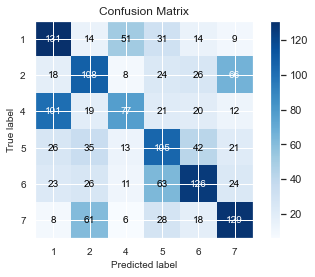

In [49]:
evaluate_features(truncated_bag_of_words, new_train_df['Class'].values.ravel())

C:\Users\shashi\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.0s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.1s finished
C:\Users\shashi\Documents\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


Log loss: 1.4504773403180444
Accuracy: 0.45016501650165014


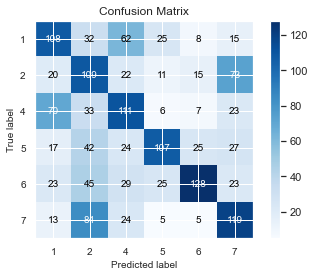

In [50]:
evaluate_features(truncated_bag_of_words, new_train_df['Class'].values.ravel(), 
                  RandomForestClassifier(n_estimators=1000, max_depth=5, verbose=1))

In [51]:
count_vectorizer = TfidfVectorizer(
    analyzer="word", tokenizer=nltk.word_tokenize,
    preprocessor=None, stop_words='english', max_features=None)    

tfidf = count_vectorizer.fit_transform(allText_train)

len(count_vectorizer.get_feature_names())

130353

In [52]:
svd = TruncatedSVD(n_components=25, n_iter=25, random_state=12)
truncated_tfidf = svd.fit_transform(tfidf)

C:\Users\shashi\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
C:\Users\shashi\Documents\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


Log loss: 1.4112436387590095
Accuracy: 0.44224422442244227


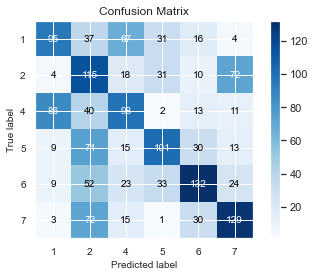

In [53]:
evaluate_features(truncated_tfidf, new_train_df['Class'].values.ravel())

C:\Users\shashi\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.1s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.2s finished
C:\Users\shashi\Documents\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


Log loss: 1.4635796023808922
Accuracy: 0.4429042904290429


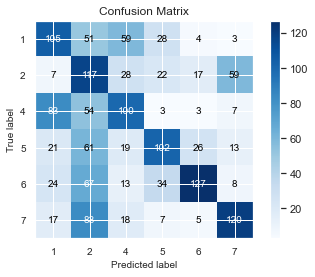

In [54]:
evaluate_features(truncated_tfidf, new_train_df['Class'].values.ravel(), 
                  RandomForestClassifier(n_estimators=1000, max_depth=5, verbose=1))

In [55]:
count_vectorizer = CountVectorizer(
    analyzer="word", tokenizer=nltk.word_tokenize,
    preprocessor=None, stop_words='english', max_features=None)

bag_of_words = count_vectorizer.fit_transform(allText_test)

len(count_vectorizer.get_feature_names())

253402

In [56]:
svd = TruncatedSVD(n_components=25, n_iter=25, random_state=12)
truncated_bag_of_words = svd.fit_transform(bag_of_words)

In [ ]:
evaluate_features(truncated_bag_of_words, new_train_df['Class'].values.ravel())